In [1]:
# Hiperparametrelerin tanımlanması
generation_count = 100
individual_count = 100
gen_count = 100
mutation_rate = 0.1
crossover_rate = 0.2
elite_rate = 0.2
category_1 = "POLITICS"
category_2 = "SPORTS"

"""
ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
"""



max_fitness_per_gen = []
average_fitness_per_gen = []

In [2]:
import pandas as pd
import numpy as np


In [3]:
# verisetinin okunması
df = pd.read_csv("news.csv")
df = df.drop(['body'], axis=1)
df.head()


,category,title
0,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...
1,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...
2,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...
3,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...
4,ARTS & CULTURE,This Artist Gives Renaissance-Style Sculptures...


In [4]:
# kategori listelenmesi
categories = df.category.unique()
category_counts = df.category.value_counts()
category_counts

ARTS & CULTURE    1002
BUSINESS           501
ENTERTAINMENT      501
ENVIRONMENT        501
POLITICS           501
RELIGION           501
SPORTS             501
TECH               501
WOMEN              501
EDUCATION          490
COMEDY             380
SCIENCE            350
MEDIA              347
CRIME              300
Name: category, dtype: int64

In [5]:
dfpol = df[df["category"] == category_1].head(200)
dfsports = df[df["category"] == category_2].head(200)


In [6]:
dfpol.shape


(200, 2)

In [7]:
import re


In [8]:
# verisetindeki gereksiz karakterlerin temizlenmesi
def text_clean(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub(
        r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


In [9]:
dfpol["title"] = dfpol["title"].apply(text_clean)
dfpol.head()
dfsports.head()


,category,title
5374,SPORTS,Jets Chairman Christopher Johnson Won't Fine P...
5375,SPORTS,Trump Posthumously Pardons Boxer Jack Johnson
5376,SPORTS,NFL Bans Kneeling During The National Anthem
5377,SPORTS,The History Of The National Anthem In Sports
5378,SPORTS,Israeli Soccer Team Beitar Jerusalem To Add 'T...


In [10]:
dfsports["title"] = dfsports["title"].apply(text_clean)
dfsports.head()


,category,title
5374,SPORTS,jets chairman christopher johnson wont fine pl...
5375,SPORTS,trump posthumously pardons boxer jack johnson
5376,SPORTS,nfl bans kneeling during the national anthem
5377,SPORTS,the history of the national anthem in sports
5378,SPORTS,israeli soccer team beitar jerusalem to add tr...


In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# gereksiz kelimelerin çıkarılması
stop_words = set(stopwords.words('english'))
stop_words


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
# kelimelerin gruplara ayrılması
politics = set()
sports = set()


for i in dfpol["title"]:
    for j in i.split():
        politics.add(j)

for i in dfsports["title"]:
    for j in i.split():
        sports.add(j)


In [14]:
len(politics)


1163

In [15]:
len(sports)


1033

In [16]:
# gereksiz kelimelerin çıkarılması
politics = politics - stop_words
sports = sports - stop_words
vocab = politics.union(sports)
len(politics)


1085

In [17]:
len(sports)


952

In [18]:
len(vocab)

1849

In [19]:
# ilk bireylerin oluşturulması

import random


def create_array(individual, count):
    population = []
    for i in range(individual):
        individual = []
        for j in range(count):
            # select random word from vocab set
            individual.append(random.choice(list(vocab)))
        population.append(individual)

    return population


population = create_array(individual_count, gen_count)
print(len(population))
print(population)


100
[['officials', 'parenthood', 'obama', 'damaging', 'race', 'czech', 'dan', 'key', 'teammate', 'death', 'louisville', 'extreme', 'aly', 'hearing', 'whose', 'sessions', 'dominates', 'story', 'tara', 'neck', 'american', 'magazines', 'costs', 'meldonium', 'something', 'dem', 'catches', 'reportedly', 'settle', 'delivered', 'giuliani', 'democrats', 'st', 'immigrant', 'jones', 'denies', 'event', 'loves', 'brother', 'propolice', 'germany', 'obtained', 'tired', 'kneel', 'parenthood', 'gig', 'wont', 'competing', 'watch', 'events', 'details', 'glory', 'jimmy', 'hold', 'jump', 'slalom', 'kushner', 'map', 'call', 'twoman', 'team', 'agenda', 'covered', 'medal', 'sums', 'curbs', 'wife', 'without', 'short', 'trade', 'political', 'jong', 'nonhouse', 'runner', 'tasteless', 'industry', 'taboo', 'get', 'michelle', 'congressional', 'japan', 'host', 'unaware', 'could', 'report', 'influencer', 'report', 'must', 'wiretaps', 'claim', 'since', 'gay', 'doubles', 'member', 'sweet', 'clinches', 'fight', 'ice', 

In [20]:
# fitness fonksiyonu
def fitness(population):
    scores = []
    for individual in population:
        tempscore = 0
        for word in individual:
            if individual.index(word) < (gen_count//2):
                if word in politics:
                    tempscore += 1
                else:
                    tempscore -= 1
            else:
                if word in sports:
                    tempscore += 1
                else:
                    tempscore -= 1
        scores.append(tempscore)

    return scores


In [21]:
# crossover fonksiyonu
def crossover(parent1, parent2):
    child = [None]*gen_count

    for i in range(gen_count):
        if random.random() < crossover_rate:
            if parent1[i] in child:
                child[i] = parent2[i]
            else:
                child[i] = parent1[i]
        else:
            if parent2[i] in child:
                child[i] = parent1[i]
            else:
                child[i] = parent2[i]

    return child


In [22]:
# mutasyon fonksiyonu
def mutation(individual):
    mutated = [None] * len(individual)
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            mutated[i] = random.choice(list(vocab))
        else:
            mutated[i] = individual[i]
    return mutated


In [23]:
# yeni nesil bireylerin oluşturulması
def newgenerationchilds(population):
    newgen = []
    elites = []

    populationfitness = fitness(population)
    average_fitness_per_gen.append(sum(populationfitness)/len(population))
    max_fitness_per_gen.append(max(populationfitness))

    
    newpopulation = [x for _, x in sorted(
        zip(populationfitness, population), reverse=True)]

    for i in range(int(elite_rate*len(population))):
        newgen.append(newpopulation[i])
        elites.append(newpopulation[i])

    for i in range(len(population)-int(elite_rate*len(population))):
        parent1 = random.choice(elites)
        parent2 = random.choice(elites)

        child = crossover(parent1, parent2)
        child = mutation(child)
        newgen.append(child)

    return newgen


In [24]:
# yeni nesil bireylerin oluşturulması
for i in range(generation_count):
    population = newgenerationchilds(population)


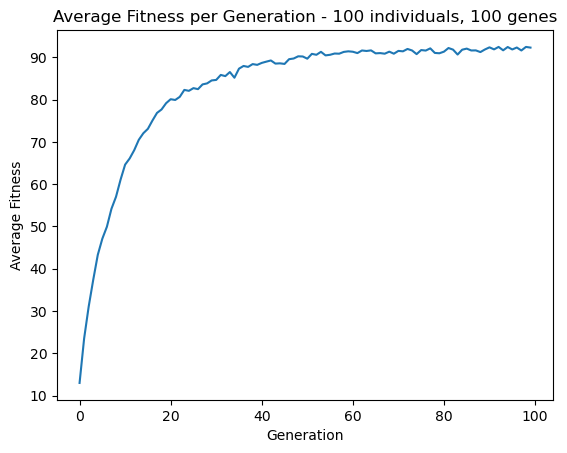

In [25]:
# grafiklerin oluşturulması
import matplotlib.pyplot as plt

plt.plot(average_fitness_per_gen)
plt.ylabel('Average Fitness')
plt.xlabel('Generation')

plt.title(
    f'Average Fitness per Generation - {individual_count} individuals, {gen_count} genes')
plt.show()


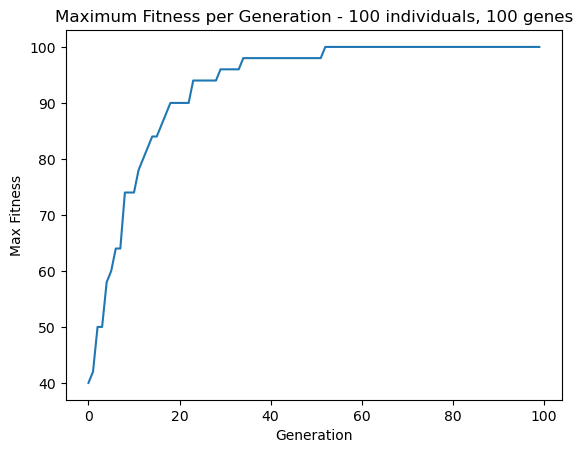

In [26]:
plt.plot(max_fitness_per_gen)
plt.ylabel('Max Fitness')
plt.xlabel('Generation')
plt.title(
    f'Maximum Fitness per Generation - {individual_count} individuals, {gen_count} genes')


plt.show()


In [27]:
# en iyi bireyin bulunması
best_individual = population[fitness(
    population).index(max(fitness(population)))]
print(f"{category_1} - {category_2}")
print(best_individual)
print()


POLITICS - SPORTS
['unaware', 'resigns', 'september', 'joins', 'nothing', 'vietnam', 'companies', 'magazines', 'suggests', 'sen', 'schoolers', 'cyber', 'treatment', 'ruled', 'videos', 'agent', 'parents', 'liar', 'catholic', 'christians', 'app', 'street', 'trumps', 'hearing', 'trumpkim', 'fe', 'lift', 'citizenship', 'civil', 'justice', 'boulder', 'deadly', 'resort', 'bots', 'secretary', 'states', 'collusion', 'confirmed', 'neutrality', 'hunting', 'pot', 'giving', 'bring', 'alex', 'going', 'singleuse', 'endorsement', 'democratic', 'taboo', 'undocumented', 'abusing', 'minutes', 'best', 'larry', 'game', 'treatment', 'barack', 'czechs', 'epic', 'updates', 'brady', 'nassar', 'johnson', 'numbers', 'test', 'nhl', 'figure', 'shirtless', 'holcomb', 'ted', 'fails', 'covered', 'destroys', 'depression', 'champions', 'feet', 'athlete', 'korea', 'havoc', 'sums', 'water', 'shaquem', 'playoff', 'ivanka', 'champion', 'officials', 'buzzer', 'say', 'suspected', 'barred', 'put', 'tattoos', 'norwegian', 'co